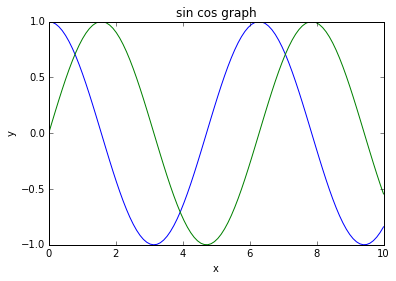

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

x = np.linspace(0,10,100)
y_cos = np.cos(x)
y_sin = np.sin(x)
plt.figure()
plt.plot(x,y_cos,)
plt.plot(x,y_sin)
plt.title("sin cos graph")
plt.xlabel("x")
plt.ylabel("y")
plt.rcParams['axes.color_cycle'] = ['red','blue','green']
plt.show()


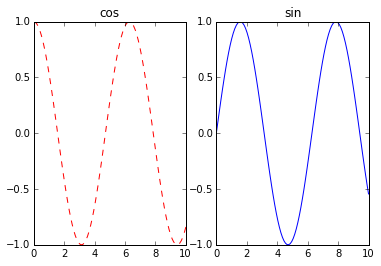

In [2]:
plt.subplot(1,2,1)
plt.plot(x,y_cos,'r--')
plt.title("cos")
plt.subplot(1,2,2)
plt.plot(x,y_sin,'b')
plt.title('sin')

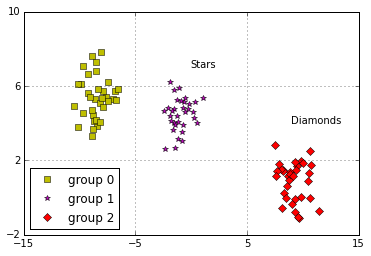

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

d = make_blobs(n_samples=100,n_features=2, centers=3,random_state=7)
groups = d[1]
coordinates = d[0]

plt.plot(coordinates[groups==0,0],coordinates[groups==0,1], 'ys', label='group 0')
plt.plot(coordinates[groups==1,0],coordinates[groups==1,1], 'm*', label='group 1')
plt.plot(coordinates[groups==2,0],coordinates[groups==2,1], 'rD', label='group 2')
plt.grid()
plt.ylim(-2,10)
plt.yticks([10,6,2,-2])
plt.xticks([15,-5,5,-15])
plt.annotate('Stars',(0,7))
plt.annotate('Diamonds',(9,4))
plt.legend(loc='lower left',numpoints=1)
plt.show()

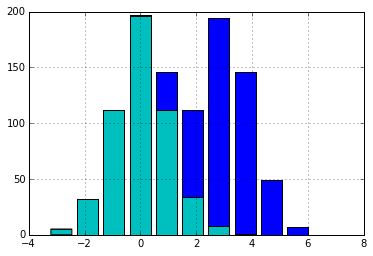

In [4]:
import numpy as np
x  = np.random.normal(loc=0.0, scale=1.0, size=500)
z = np.random.normal(loc=3.0, scale=1.0, size=500)

plt.hist(np.column_stack((x,z)),bins=10,color=['c','b'],stacked=True)
plt.grid()

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


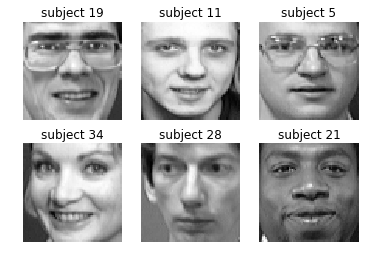

In [5]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_olivetti_faces(shuffle=True,random_state=5)
photo = 1
for k in range(6):
    plt.subplot(2,3,k)
    plt.imshow(dataset.data[k].reshape(64,64),cmap=plt.cm.gray,interpolation='nearest')
    plt.title('subject '+str(dataset.target[k]))
    plt.axis('off')
plt.show()

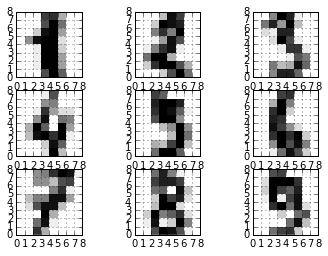

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
for number in range(1,10):
    plt.subplot(3,3,number)
    plt.imshow(digits.images[number],cmap='binary',interpolation='none',extent=[0,8,0,8])
    plt.grid()
plt.show()

0.14.1


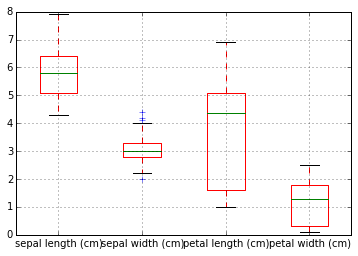

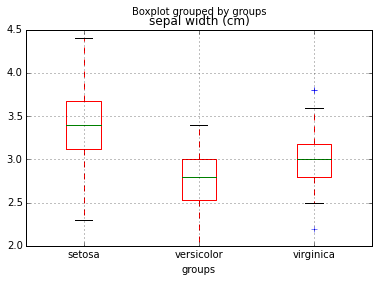

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
print (pd.__version__)
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
groups = list(iris.target)
iris_df['groups'] = pd.Series([iris.target_names[k] for k in groups])
boxplots = iris_df.boxplot(return_type='axes')
boxplots = iris_df.boxplot(column='sepal width (cm)',by='groups',return_type='axes')


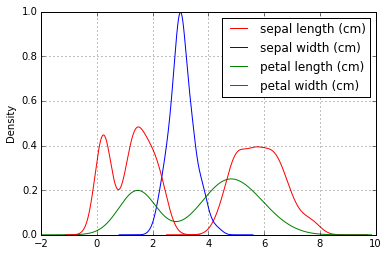

In [8]:
densityplot = iris_df.plot(kind='density')

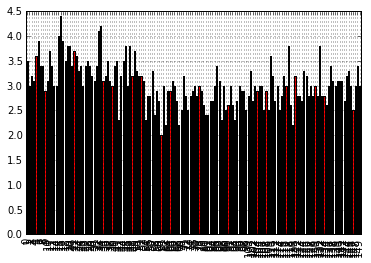

In [12]:
single_distrubution = iris_df['sepal width (cm)'].plot(kind='bar')


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


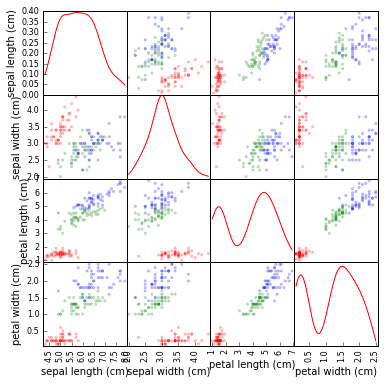

In [13]:
from pandas.tools.plotting import scatter_matrix
colors_palette = {0:"red",1: "green",2:"blue"}
colors = [colors_palette[c] for c in groups]
matrix_of_scatterplots = scatter_matrix(iris_df,alpha=0.2,figsize=(6,6),color=colors,diagonal='kde')

In [ ]:
import urllib2
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/ijcnn1.bz2'
with open('ijcnn1.bz2','wb') as W:
    W.write(urllib2.urlopen(target_page).read())
from sklearn.datasets import load_svmlight_file
X_train,y_train = load_svmlight_file('ijcnn1.bz2')
first_rows=2500

X_train, y_train = X_train[:first_rows,:], y_train[:first_rows]

import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
hypothesis = SVC(kernel='rbf',degree=2,random_state=101)
scores = cross_val_score(hypothesis,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
print ("SVC with rbf kenerl")
print (np.mean(scores))
print (np.std(scores))
